Naive Bayes

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

Import Libraries

In [3]:
salarydata_train= pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_12_Naive_Bayes\SalaryData_Train.csv')
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salarydata_test= pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_12_Naive_Bayes\SalaryData_Test.csv')
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [5]:
salarydata_train.shape

(30161, 14)

In [6]:
salarydata_test.shape

(15060, 14)

In [7]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
salarydata_train.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [15]:
salarydata_train.duplicated().shape

(30161,)

In [16]:
salarydata_train[salarydata_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [24]:
salarydata_train=salarydata_train.drop_duplicates()
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [26]:
salarydata_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [29]:
salarydata_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [30]:
salarydata_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [31]:
# check labels in occupation variable

salarydata_train.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [32]:
salarydata_train.occupation.value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [34]:
pd.crosstab(salarydata_train['occupation'],salarydata_train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [35]:
# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [36]:
salarydata_train.native.value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [38]:
pd.crosstab(salarydata_train['workclass'],salarydata_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


In [39]:
pd.crosstab(salarydata_train['workclass'],salarydata_train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,309,9,62,175,8,22,14,34,0,165,27,14,66,24
Local-gov,277,0,139,211,28,46,11,187,0,667,291,7,38,112
Private,2378,0,2391,2333,430,1064,1581,2370,141,2042,185,2530,669,1099
Self-emp-inc,28,0,97,369,51,2,10,27,0,156,5,275,3,26
Self-emp-not-inc,49,0,487,375,419,15,35,173,0,360,6,368,26,118
State-gov,247,0,52,183,15,9,13,122,0,393,112,11,56,40
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


Visualization

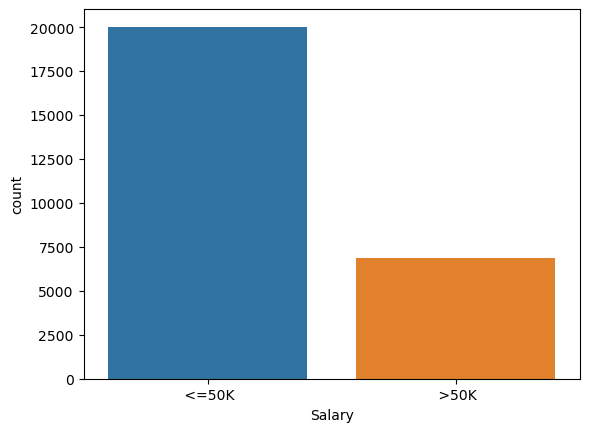

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [43]:
sns.countplot(x='Salary',data= salarydata_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
salarydata_train['Salary'].value_counts()

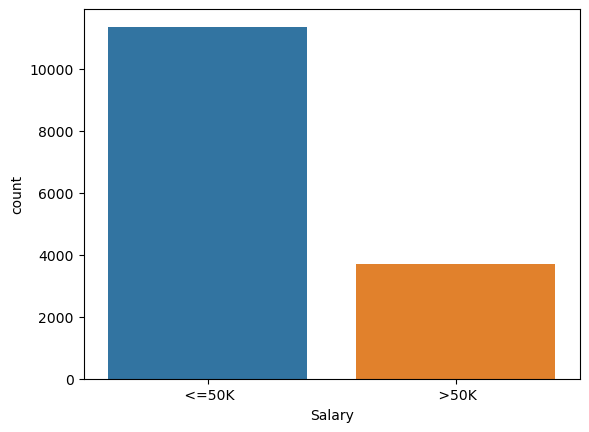

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [46]:
sns.countplot(x='Salary',data= salarydata_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
salarydata_test['Salary'].value_counts()

<Axes: xlabel='count', ylabel='occupation'>

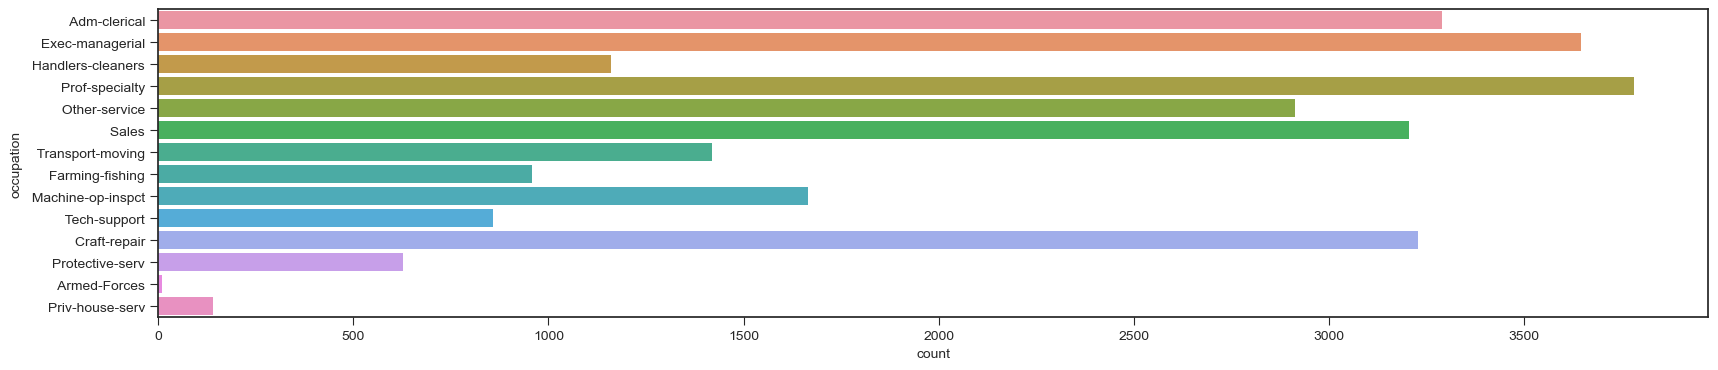

In [47]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=salarydata_train)

<Axes: xlabel='count', ylabel='occupation'>

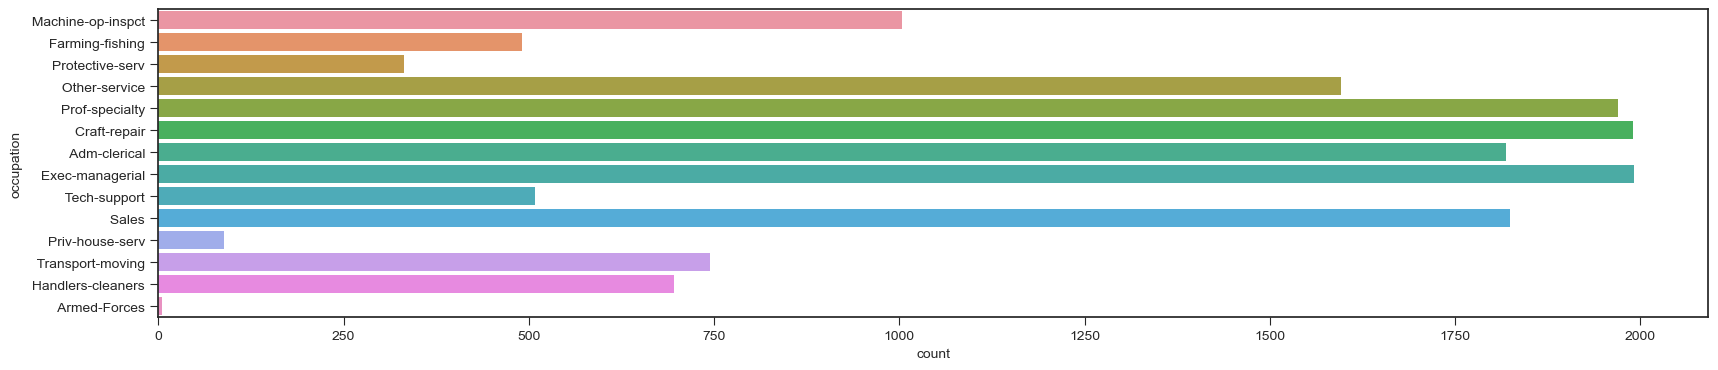

In [48]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=salarydata_test)

<Axes: xlabel='count', ylabel='workclass'>

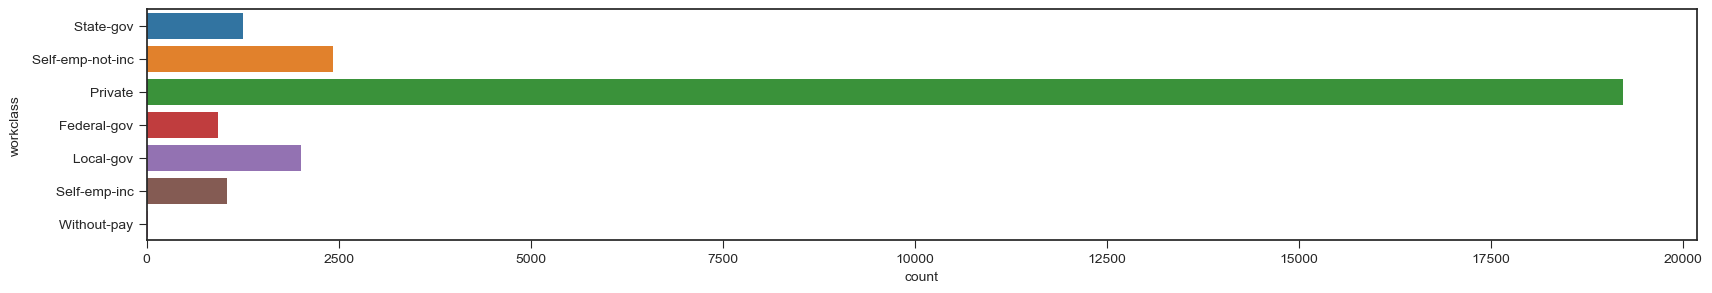

In [49]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=salarydata_train)

<Axes: xlabel='count', ylabel='workclass'>

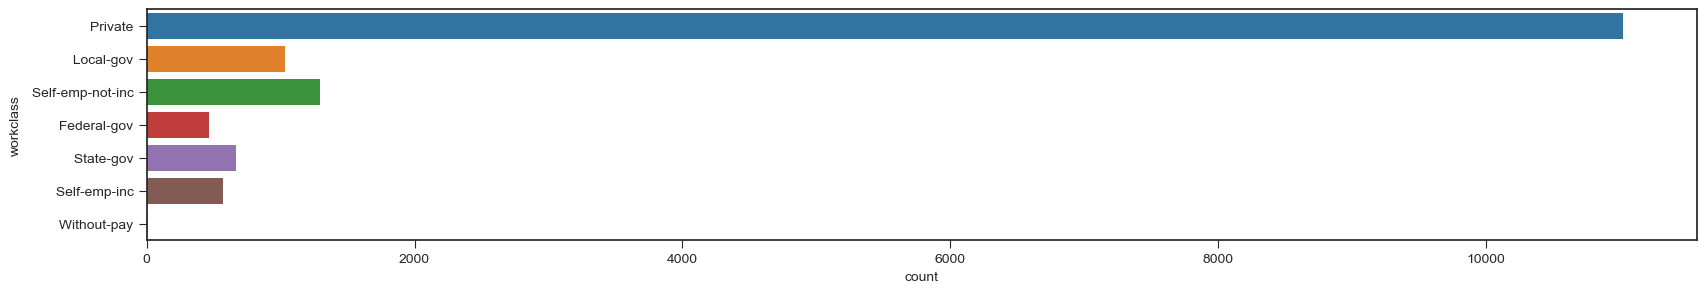

In [50]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=salarydata_test)

<Axes: xlabel='education'>

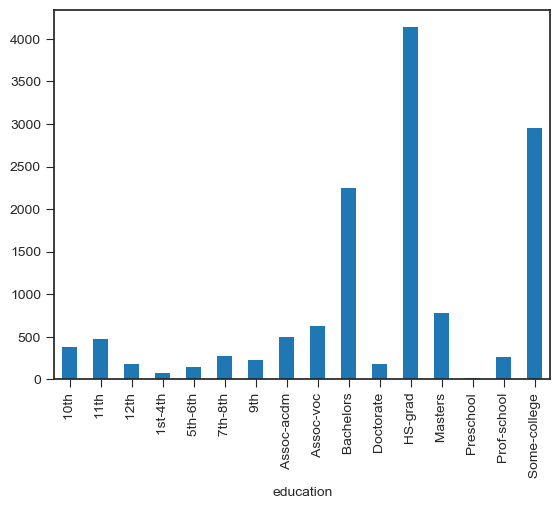

In [51]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

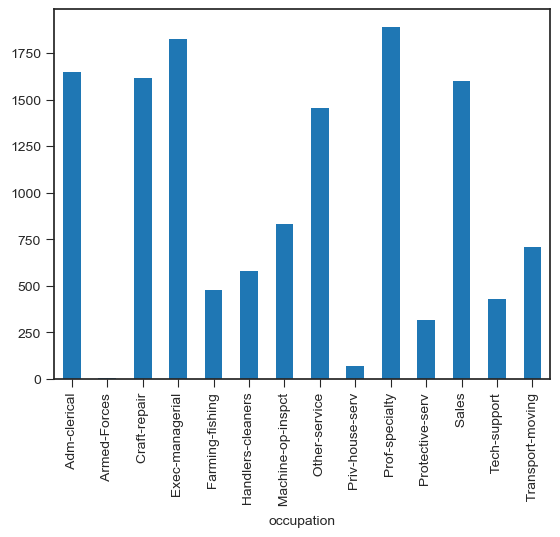

In [53]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

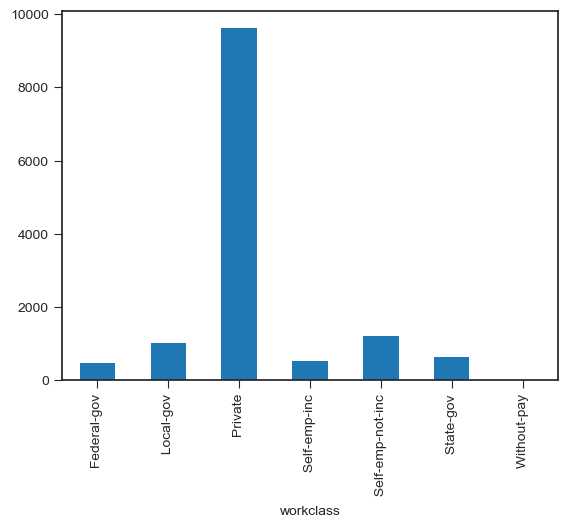

In [54]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['workclass']).mean().plot(kind='bar')


<Axes: xlabel='sex'>

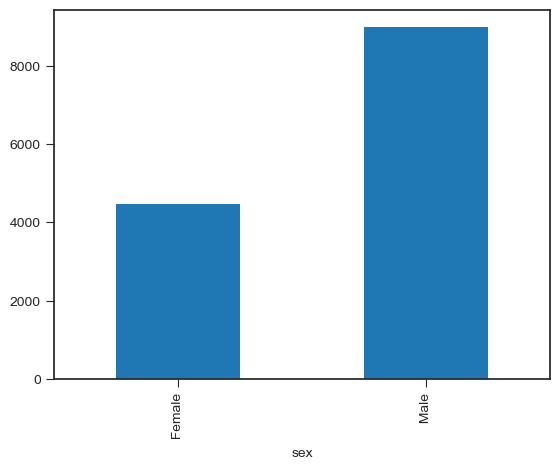

In [55]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

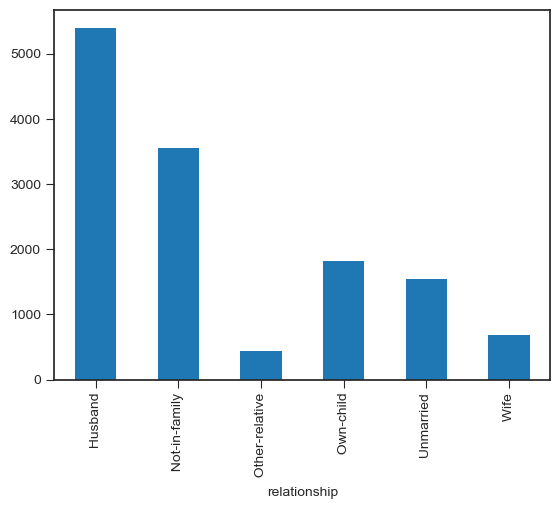

In [56]:
pd.crosstab(salarydata_train['Salary'],salarydata_train['relationship']).mean().plot(kind='bar')

In [57]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [64]:
#Preprocessing
number = LabelEncoder()
for i in string_columns:
        salarydata_train[i]= number.fit_transform(salarydata_train[i])
        salarydata_test[i] = number.fit_transform(salarydata_test[i])
    

In [65]:
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [67]:
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [68]:
#Capturing the column names which can help in futher process
colnames = salarydata_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [69]:
len(colnames)

14

In [70]:
salarydata_test['maritalstatus'].value_counts()

2    6990
4    4872
0    2083
5     472
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [71]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = salarydata_train[colnames[0:13]].values
y_train = salarydata_train[colnames[13]].values
x_test = salarydata_test[colnames[0:13]].values
y_test =salarydata_test[colnames[13]].values

In [73]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [74]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [75]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [76]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [72]:
#Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [77]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

Applying naive bayes for classification

In [78]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [79]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.7442664386871353

In [80]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi

0.7543160690571049

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [82]:
confusion_matrix

array([[11360,     0],
       [ 3700,     0]], dtype=int64)

In [83]:
#calculating the accuracy of this model with respect to this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7543160690571049


In [84]:
# GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [85]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.7933687692822362

In [86]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.7956175298804781

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [88]:
confusion_matrix

array([[10796,   564],
       [ 2514,  1186]], dtype=int64)

In [89]:
#calculating the accuracy of this model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7956175298804781
